In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.5.1+cu121'

In [2]:
weight = 0.7
bias = .3

start = 0
end = 1
step = .02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias



In [3]:
len(X), len(y)

(50, 50)

In [4]:
#train/test split --- primitive way

train_split = int(0.8 *len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [6]:
def plot_pred(train_data= X_train, train_labels = y_train,
               test_data = X_test, test_labels = y_test,
               predictions=None):
    """
    plots training data, test data and compares prediction
    """
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    plt.scatter(test_data, test_labels, c="r", s=4, label="Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label= "Predcition")

    plt.legend(prop={"size":14})

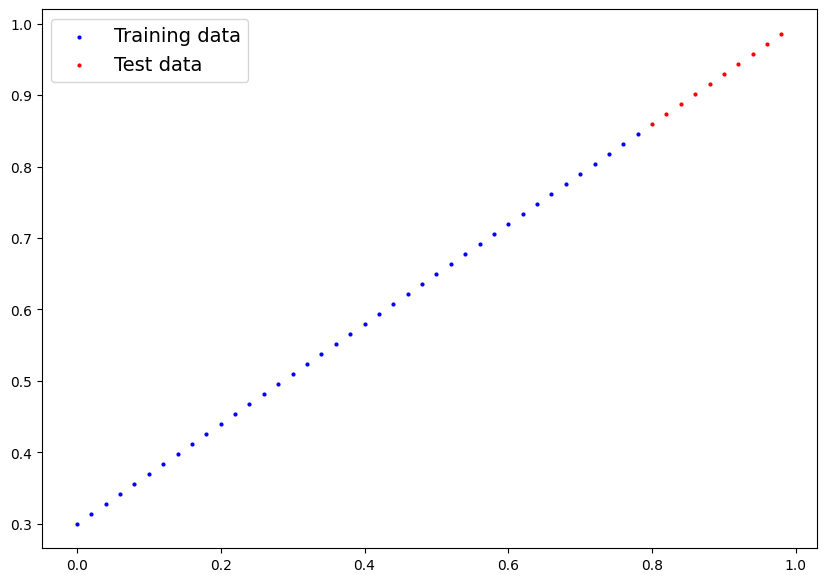

In [7]:
plot_pred()

In [8]:
#Model desoooo
class LinReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        #forward method
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [9]:
torch.manual_seed(42)

lr = LinReg()

list(lr.parameters()) 


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
lr.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
with torch.inference_mode():
    y_preds = lr(X_test)

y_preds, y_test

(tensor([[0.3982],
         [0.4049],
         [0.4116],
         [0.4184],
         [0.4251],
         [0.4318],
         [0.4386],
         [0.4453],
         [0.4520],
         [0.4588]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

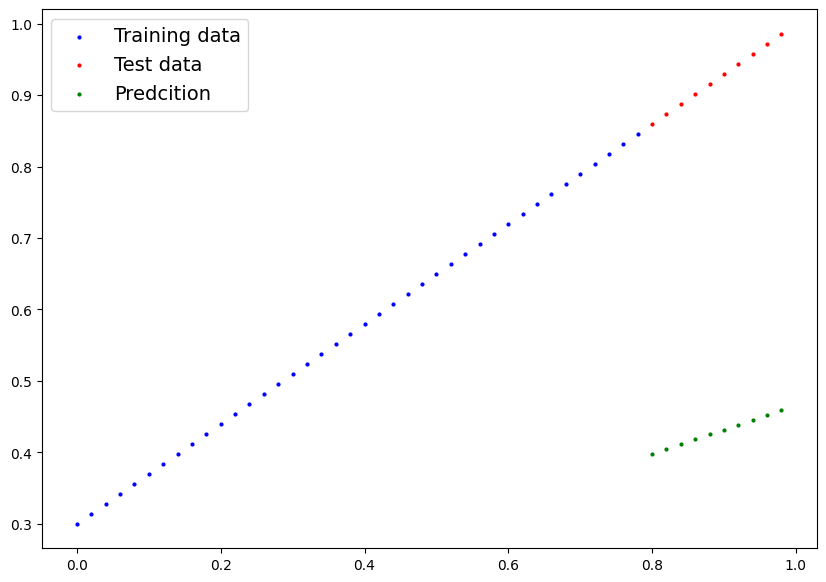

In [12]:
plot_pred(predictions=y_preds)

In [13]:
#Training

In [14]:
list(lr.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
loss_fn = nn.L1Loss() 

In [16]:
optimizer = torch.optim.SGD(params= lr.parameters(), lr=0.01) #fukc around with lr

In [ ]:
epochs = 200 # to fukc around

#Track diff values
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    lr.train()
    #1. Forward pass
    y_pred = lr(X_train)

    #2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    #3. Optimizer zero grad - makes the grad 0 from step from the pervious pass 
    optimizer.zero_grad()

    #4.Perfrom Backpropagation
    loss.backward()

    #5. Step the Optimizer (perfrom Gradient Descent )
    optimizer.step()


    # Testingg
    lr.eval()
    with torch.inference_mode(): # turns of gradient tracking & more
        test_pred = lr(X_test) # forward pass

        test_loss = loss_fn(test_pred, y_test) # loss calculation
        if epoch % 10 ==0:
            epoch_count.append(epoch)
            loss_values.append(loss.item())
            test_loss_values.append(test_loss.item())
            print(f"Epoch: {epoch} | loss : {loss} | Test loss: {test_loss}")
            print(lr.state_dict())

Epoch: 0 | loss : 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | loss : 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | loss : 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | loss : 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | loss : 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | loss : 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | loss : 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor(

In [18]:
list(lr.parameters())   

[Parameter containing:
 tensor([0.6990], requires_grad=True),
 Parameter containing:
 tensor([0.3093], requires_grad=True)]

In [19]:
with torch.inference_mode():
    y_preds = lr(X_test)

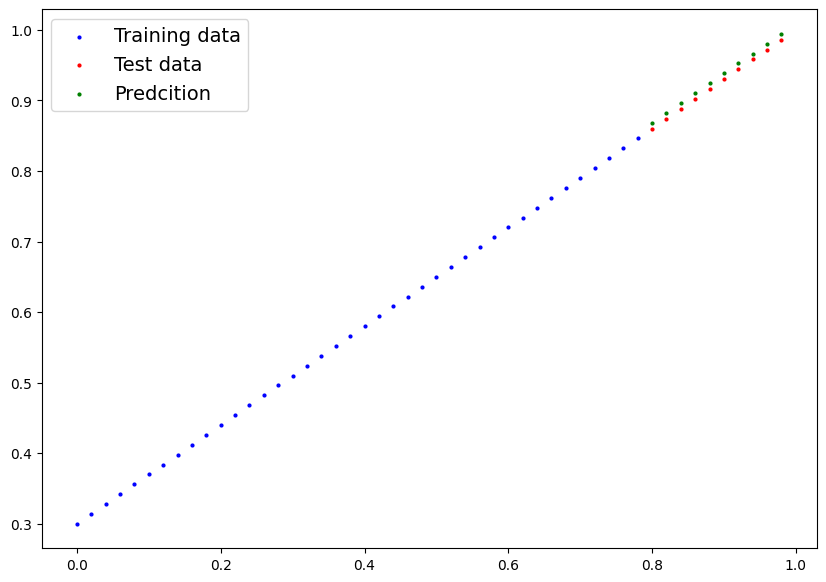

In [20]:
plot_pred(predictions=y_preds)

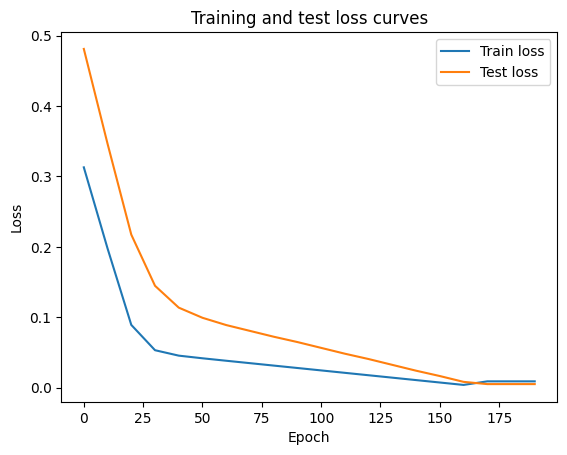

In [21]:
plt.plot(epoch_count, loss_values, label= "Train loss")
plt.plot(epoch_count, test_loss_values, label= "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()